<a href="https://colab.research.google.com/github/AbdulWahabRaza123/ML/blob/main/QuantizedHandDigitRecognizationUsingCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape,y_train.shape #checking shape of trainning dataset

((60000, 28, 28), (60000,))

In [4]:
X_test.shape #checking shape of testing dataset

(10000, 28, 28)

In [5]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [6]:
def show_sample(X,y,index): 
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(y[index])

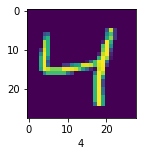

In [7]:
show_sample(X_train,y_train,2)

In [8]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [9]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [10]:
#Now normalizing data for X_train and X_test
X_train_norm=X_train/255
X_test_norm=X_test/255

In [11]:
X_train_norm[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
#Now data is normalize so we can train the model now using cnn
cnn=keras.models.Sequential(
    [
        #cnn layers
     keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)),
     keras.layers.MaxPooling2D((2,2)),
     keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu"),
     keras.layers.MaxPooling2D((2,2)),
     #Dense Layers
     keras.layers.Flatten(),
     keras.layers.Dense(64,activation="relu"),
     keras.layers.Dense(10,activation="softmax")
    ]
)
cnn.compile(
    optimizer='adam',
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [13]:
cnn.fit(X_train,y_train,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 17s 3ms/step - loss: 0.3645 - accuracy: 0.9339
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0753 - accuracy: 0.9772
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0565 - accuracy: 0.9828
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0466 - accuracy: 0.9860
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0394 - accuracy: 0.9880
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0355 - accuracy: 0.9893
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0332 - accuracy: 0.9894
Epoch 8/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0254 - accuracy: 0.9923
Epoch 9/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0247 - accuracy: 0.9922
Epoch 10/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.02

In [14]:
X_train[0].shape

(28, 28)

In [15]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0701 - accuracy: 0.9856


[0.07011597603559494, 0.9855999946594238]

In [16]:
y_pred=cnn.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [17]:
y_pred[:5]

array([[3.1679699e-16, 1.0520785e-19, 3.4849335e-12, 5.1632171e-22,
        7.8287616e-22, 2.3508795e-23, 1.3083063e-31, 1.0000000e+00,
        9.8966112e-19, 3.2383105e-13],
       [5.3983711e-13, 4.4919449e-21, 1.0000000e+00, 8.5244735e-21,
        2.2807657e-25, 4.6583604e-27, 2.1325672e-18, 2.8783313e-19,
        2.5661324e-19, 1.1391343e-29],
       [3.9810479e-17, 1.0000000e+00, 1.9476234e-13, 2.0181962e-18,
        1.2928873e-15, 1.9965575e-13, 1.4753010e-16, 6.1840658e-11,
        4.8165867e-11, 2.7349133e-15],
       [1.0000000e+00, 2.8740240e-31, 7.8148811e-16, 7.3654074e-25,
        1.2792436e-23, 6.9242441e-21, 3.8094100e-16, 1.5110348e-25,
        3.0965722e-13, 1.8808939e-17],
       [9.2619331e-25, 7.5164976e-17, 9.7483581e-24, 2.3727727e-23,
        1.0000000e+00, 2.5384941e-17, 6.3843826e-23, 3.0133278e-14,
        9.6747883e-23, 5.4560056e-10]], dtype=float32)

In [18]:
y_pred_number=[np.argmax(element) for element in y_pred]

In [19]:
y_pred_number[:5] #these are predicted values

[7, 2, 1, 0, 4]

In [20]:
y_test[:5] #these are actual values

array([7, 2, 1, 0, 4], dtype=uint8)

In [21]:
#checking classification report
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
print("This is classification report ",classification_report(y_test,y_pred_number))

This is classification report                precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [22]:
cnn.save("./moved_model")

#1) Post Trainning Quantization

In [24]:
# Without Quantization
converter=tf.lite.TFLiteConverter.from_saved_model('./moved_model')
tflite_model=converter.convert()

In [39]:
# size in mb's
len(tflite_model)/1024

243.421875

In [34]:
# with Quantization
converter=tf.lite.TFLiteConverter.from_saved_model('./moved_model')
converter.optimizations=[tf.lite.Optimize.DEFAULT]
tflite_quant_model=converter.convert()

In [38]:
# size in mb's
len(tflite_quant_model)/1024

66.8984375

In [41]:
with open("tflite_model.tflite","wb") as f:
  f.write(tflite_model)
with open("tflite_quant_model.tflite","wb") as f:
  f.write(tflite_quant_model)

#2) Quantized Aware Trainning

In [44]:
import tensorflow_model_optimization as tfmot

In [45]:
quantized_model=tfmot.quantization.keras.quantize_model
q_aware_cnn=quantized_model(cnn)
q_aware_cnn.compile(
    optimizer='adam',
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
q_aware_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 quantize_layer (QuantizeLay  (None, 28, 28, 1)        3         
 er)                                                             
                                                                 
 quant_conv2d (QuantizeWrapp  (None, 26, 26, 32)       387       
 erV2)                                                           
                                                                 
 quant_max_pooling2d (Quanti  (None, 13, 13, 32)       1         
 zeWrapperV2)                                                    
                                                                 
 quant_conv2d_1 (QuantizeWra  (None, 11, 11, 32)       9315      
 pperV2)                                                         
                                                                 
 quant_max_pooling2d_1 (Quan  (None, 5, 5, 32)         1

In [47]:
q_aware_cnn.fit(X_train,y_train,epochs=1)

1875/1875 [==============================] - 15s 7ms/step - loss: 0.0324 - accuracy: 0.9927


In [48]:
q_aware_cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0951 - accuracy: 0.9836


[0.09511584788560867, 0.9836000204086304]

In [49]:
converter=tf.lite.TFLiteConverter.from_keras_model(q_aware_cnn)
converter.optimizations=[tf.lite.Optimize.DEFAULT]
tflite_qaware_model=converter.convert()

/usr/local/lib/python3.8/dist-packages/tensorflow/lite/python/convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


In [50]:
with open("tflite_qaware_model.tflite","wb") as f:
  f.write(tflite_qaware_model)

In [52]:
#checking size with good accuracy
len(tflite_qaware_model)/1024

66.7265625